- Convolution : 3x3x1 image -> 2x2x1 filter W , Stride: 1x1, Padding: VALID

In [3]:
%matplotlib inline

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn

(1, 3, 3, 1)


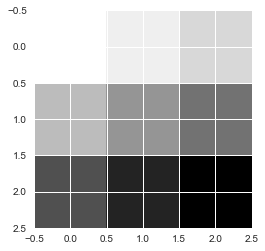

In [4]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

In [8]:
weight = tf.constant([[[[1.]],[[1.]]], [[[1.]],[[1.]]]])
print(weight.shape)

(2, 2, 1, 1)


In [9]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.eval()
print(conv2d_img.shape)

(1, 2, 2, 1)


[[ 12.  16.]
 [ 24.  28.]]


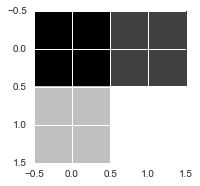

In [10]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

In [11]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print(conv2d_img.shape)

(1, 3, 3, 1)


[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


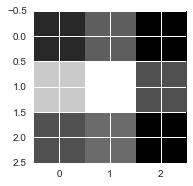

In [13]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


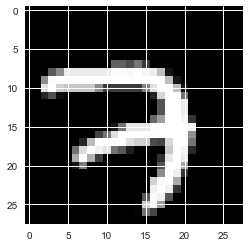

In [17]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

# Convolution

In [19]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
print(conv2d)

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


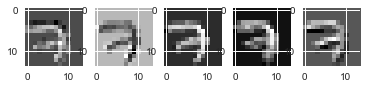

In [21]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

In [23]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(pool)

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


# Max pooling

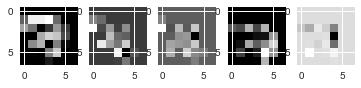

In [25]:
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5, i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')